# Daily News Prediction Models

By Manoj Wajekar(mw3451@nyu.edu) & Aditya Kapoor(ak6178@nyu.edu)

Importing all packages

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import requests
from io import BytesIO

In [237]:
# importing file
data = pd.read_csv('..\\Project\\Combined_News_DJIA.csv')
data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


## Business case

We are trying to predict movement of market(bull or bear) using daily headlines of top 25 from Reddit site. Our target variable is binary i.e. 0(market down) or 1 (market up or unchanged), thus it is two-class classification problem. We are using python scikit-learn package for building our prediction models.

## Dataset

There are two channels of data provided in this dataset:

News data: Historical news headlines from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date. (Range: 2008-06-08 to 2016-07-01)

Stock data: Dow Jones Industrial Average (DJIA) is used to "prove the concept". (Range: 2008-08-08 to 2016-07-01)
"1" when DJIA Adj Close value rose or stayed the same
"0" when DJIA Adj Close value decreased


### Data Source

This dataset is published on [Kaggle.com](https://www.kaggle.com/aaron7sun/stocknews)
  

## Word Cloud

Using WordCloud package, to visualise which are most common occuring words when market goes up or down. We are using Bull and Bear masks for visualizing wordcloud.

In [238]:
# creating string market_up_text and market_down_text which combines all text of highlines.

market_up = []
for row in range(0,len(data.index)):
    if data['Label'][row] == 1:
        market_up.append(' '.join(str(x) for x in data.iloc[row,2:27]))
        
market_down = []
for row in range(0,len(data.index)):
    if data['Label'][row] == 0:
        market_down.append(' '.join(str(x) for x in data.iloc[row,2:27]))
        
market_up_text = ''.join(market_up)
market_down_text = ''.join(market_down)

In [239]:
# Importing bull and bear mask
response_bull = requests.get('http://www.spstencils.com/wp-content/uploads/2014/08/bull.jpg')
bull_mask = np.array(Image.open(BytesIO(response_bull.content)))

response_bear = requests.get('http://www.spstencils.com/wp-content/uploads/2014/08/Bear.jpg')
bear_mask = np.array(Image.open(BytesIO(response_bear.content)))

# Setting stopwords
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("will")
stopwords.add("say")
stopwords.add("says")

#using bull mask to visualise words when market is up
wc_up = WordCloud(background_color="white",mask=bull_mask,
               stopwords=stopwords)

#using bear mask to visualise words when market is down
wc_down = WordCloud(background_color="white",mask=bear_mask,
               stopwords=stopwords)

# Generate text
wc_up.generate(market_up_text)
wc_down.generate(market_down_text)

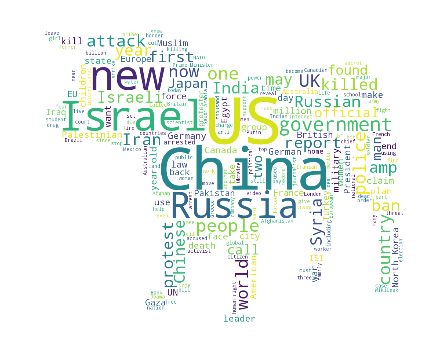

In [240]:
# show
plt.imshow(wc_up, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(50,50))
plt.show()

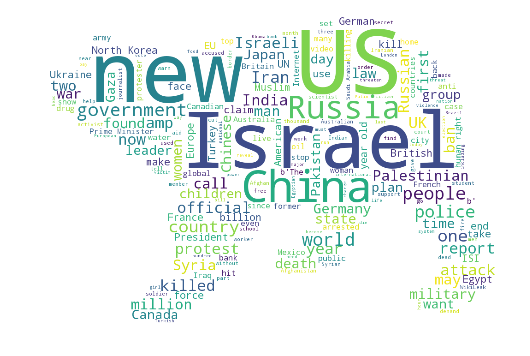

In [241]:
plt.imshow(wc_down, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,10))
plt.show()

For Bull Market, US, Israel, China, New, Russia are high frequency word in news highlines when market moves up. For bearish market: Suprisingly most of the for high frequency words are repeating for Bear market. So, It makes this prediction difficult because most of the keywords are overlapping for both cases.

## Data Modeling & Exploration

We are using bag of words concept. The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

For task evaluation, we used data from 2008-08-08 to 2014-12-31 as Training Set, and Test Set is then the following two years data (from 2015-01-02 to 2016-07-01).

We will be running following classification Models:
1. Logistic Regression
2. Decision Tree Model
3. Random Forest Model

Since our aim is to increase the predictive accuracy of our model the metric we will aim to maximise is AUC.

We are starting with NGRAM = 1, i.e. We will be split sentenece in single words, But sometimes combinations of word makes more sense and can have more predictive value. 

    eg. 'US and Japan Signed Trade deal'
            If Ngram =1, then above statement will be split as 'US', 'and', 'Japan', 'Signed', 'Trade', 'deal'
            If Ngram =2, then above statement will be split as 'US and', 'Japan Signed', 'Trade deal'
            
### scikit-learn Package for Machine Learning
We are using scikit-learn package for building predictive models. Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language.It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

### Spliting training and test dataset. 

Training dataset is used to train a model. The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from.
The training data must contain the correct answer, which is known as a target or target attribute. The learning algorithm finds patterns in the training data that map the input data attributes to the target (the answer that you want to predict), and it outputs an ML model that captures these patterns.Finally,We will use trained model to predict target variable for test dataset.Then We will use model metrics with accuracy,precision, recall and AUC to evaluate performance of metrics.

In [242]:
# Splitting Training and test dataset
train = data[data['Date'] <= '2015-01-30']
test = data[data['Date'] > '2015-01-30']

Model_Metric dataframe is used to store performance metrics of all models and update_model_metrics is function to update it.

In [243]:
Model_Metrics = pd.DataFrame(data=None,columns =['Accuracy','Precision','Recall','F-1 score','AUC'])
def update_model_metrics(y_true,y_pred, model_name):
    accuracy = sklearn.metrics.accuracy_score(y_true, y_pred)
    precision = sklearn.metrics.precision_score(y_true, y_pred)
    recall = sklearn.metrics.recall_score(y_true, y_pred)
    f1_score = sklearn.metrics.recall_score(y_true, y_pred)
    auc = sklearn.metrics.roc_auc_score(y_true, y_pred)
    metrics =[accuracy,precision,recall,f1_score,auc]
    Model_Metrics.loc[model_name] = metrics    

Combining all headlines of training and testing data in single string, so that we can use bag on words.

In [244]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))

Creating bag of words using CountVectorizer(), which convert a collection of text documents to a matrix of token counts.

In [245]:
vectorizer1 = CountVectorizer()
train1 = vectorizer1.fit_transform(trainheadlines)
test1 = vectorizer1.transform(testheadlines)

### Ngram =1 i.e. using single words in bag.

In [246]:
# Logistic Regression Model with Ngram =1
logisticmodel1 = LogisticRegression()

# training model
logisticmodel1 = logisticmodel1.fit(train1, train["Label"])

# Running prediction on test data.
logistic_predictions1 = logisticmodel1.predict(test1)

# updating performance metrics
update_model_metrics(test['Label'].values,logistic_predictions1,'Logistic Regression(NGram =1)')

In [247]:
# Decision Tree model with Ngram =1
decisiontreemodel1 = DecisionTreeClassifier()
decisiontreemodel1 = decisiontreemodel1.fit(train1, train["Label"])
decisiontree_predictions1 = decisiontreemodel1.predict(test1)
update_model_metrics(test['Label'].values,decisiontree_predictions1,'Decision Tree Model(NGram =1)')

In [248]:
# Random Forest model with Ngram =1
randomforestmodel1 = RandomForestClassifier()
randomforestmodel1 = randomforestmodel1.fit(train1, train["Label"])
randomforest_predictions1 = randomforestmodel1.predict(test1)
update_model_metrics(test['Label'].values,randomforest_predictions1,'Random Forest Model(NGram =1)')

In [249]:
Model_Metrics

,Accuracy,Precision,Recall,F-1 score,AUC
Logistic Regression(NGram =1),0.444134,0.460396,0.508197,0.508197,0.442670
Decision Tree Model(NGram =1),0.547486,0.551220,0.617486,0.617486,0.545886
Random Forest Model(NGram =1),0.486034,0.497110,0.469945,0.469945,0.486401


In [250]:
# Getting FPR, TPR , threshold values which will be used to plot ROC Curve
fpr_l, tpr_l, thresholds = sklearn.metrics.roc_curve(test['Label'].values,logistic_predictions1)
fpr_d, tpr_d, thresholds = sklearn.metrics.roc_curve(test['Label'].values,decisiontree_predictions1)
fpr_f, tpr_f, thresholds = sklearn.metrics.roc_curve(test['Label'].values,randomforest_predictions1)

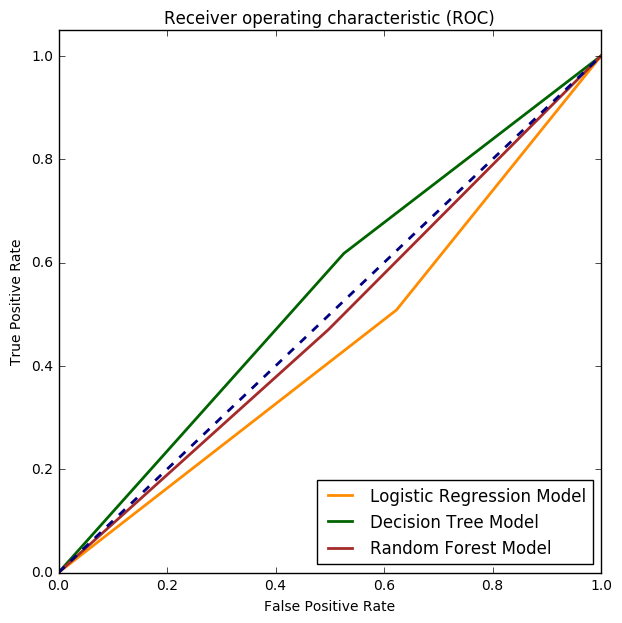

In [251]:
# Plotting ROC Curve
plt.figure(figsize=(7,7))
lw = 2

plt.plot(fpr_l, tpr_l, color='darkorange',
         lw=lw, label='Logistic Regression Model')
plt.plot(fpr_d, tpr_d, color='darkgreen',
         lw=lw, label='Decision Tree Model')
plt.plot(fpr_f, tpr_f, color='brown',
         lw=lw, label='Random Forest Model')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()

Decision Tree model performs best when we used NGRAM =1. But ROC curve is very close to 0.5 value. So, It has poor predictive value. Maybe because most of words are overlapping for bear and bull markets, due to which it is difficult to predict a market movement. We can improve the performance of model using advance machine learning techniques like tuning hyperparameter, which is out of scope of this project.

### Prediction Models for Ngram_Range = (2,2)
Considering two words at time in bag of words

In [252]:
# Initialing Count Vectorizer
vectorizer2 = CountVectorizer(ngram_range=(2,2))
train2 = vectorizer2.fit_transform(trainheadlines)
test2 = vectorizer2.transform(testheadlines)

In [253]:
# Logistic Regression Model with Ngram = 2 
logisticmodel2 = LogisticRegression()
logisticmodel2 = logisticmodel2.fit(train2, train["Label"])
logistic_predictions2 = logisticmodel2.predict(test2)
update_model_metrics(test['Label'].values,logistic_predictions2,'Logistic Regression Model(NGram =2)')

In [254]:
# Decision Tree Model with Ngram = 2
decisiontreemodel2 = DecisionTreeClassifier()
decisiontreemodel2 = decisiontreemodel2.fit(train2, train["Label"])
decisiontree_predictions2 = decisiontreemodel2.predict(test2)
update_model_metrics(test['Label'].values,decisiontree_predictions2,'Decision Tree Model(NGram =2)')

In [255]:
# Random Forest Model with Ngram = 2
randomforestmodel2 = RandomForestClassifier()
randomforestmodel2 = randomforestmodel2.fit(train2, train["Label"])
randomforest_predictions2 = randomforestmodel2.predict(test2)
update_model_metrics(test['Label'].values,randomforest_predictions2,'Random Forest Model(NGram =2)')

In [256]:
Model_Metrics

,Accuracy,Precision,Recall,F-1 score,AUC
Logistic Regression(NGram =1),0.444134,0.460396,0.508197,0.508197,0.442670
Decision Tree Model(NGram =1),0.547486,0.551220,0.617486,0.617486,0.545886
Random Forest Model(NGram =1),0.486034,0.497110,0.469945,0.469945,0.486401
Logistic Regression Model(NGram =2),0.567039,0.556452,0.754098,0.754098,0.562763
Decision Tree Model(NGram =2),0.513966,0.520548,0.622951,0.622951,0.511475
Random Forest Model(NGram =2),0.530726,0.529644,0.732240,0.732240,0.526120


In [257]:
# Getting FPR, TPR , threshold values which will be used to plot ROC Curve
fpr_l2, tpr_l2, thresholds = sklearn.metrics.roc_curve(test['Label'].values,logistic_predictions2)
fpr_d2, tpr_d2, thresholds = sklearn.metrics.roc_curve(test['Label'].values,decisiontree_predictions2)
fpr_f2, tpr_f2, thresholds = sklearn.metrics.roc_curve(test['Label'].values,randomforest_predictions2)

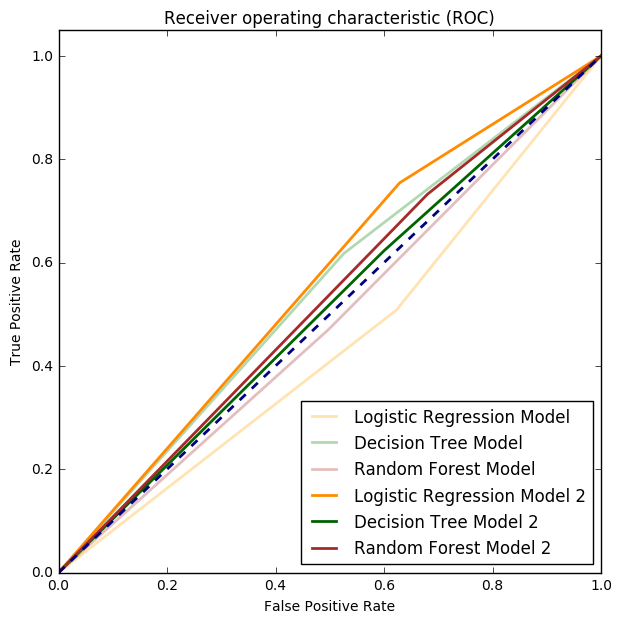

In [258]:
# Ploting ROC Curve
plt.figure(figsize=(7,7))
lw = 2
plt.plot(fpr_l, tpr_l, color='orange', alpha = 0.3,
         lw=lw, label='Logistic Regression Model')
plt.plot(fpr_d, tpr_d, color='green',alpha = 0.3,
         lw=lw, label='Decision Tree Model')
plt.plot(fpr_f, tpr_f, color='brown',alpha = 0.3,
         lw=lw, label='Random Forest Model')
plt.plot(fpr_l2, tpr_l2, color='darkorange',
         lw=lw, label='Logistic Regression Model 2')
plt.plot(fpr_d2, tpr_d2, color='darkgreen',
         lw=lw, label='Decision Tree Model 2')
plt.plot(fpr_f2, tpr_f2, color='brown',
         lw=lw, label='Random Forest Model 2')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Prediction Models for Ngram_Range = (3,3)
Considering sentance of three words at time in bag of words

In [259]:
vectorizer3 = CountVectorizer(ngram_range=(3,3))
train3 = vectorizer3.fit_transform(trainheadlines)
test3 = vectorizer3.transform(testheadlines)

In [260]:
# Logistic Regression Model with Ngram =3 
logisticmodel3 = LogisticRegression()
logisticmodel3 = logisticmodel3.fit(train3, train["Label"])
logistic_predictions3 = logisticmodel3.predict(test3)
update_model_metrics(test['Label'].values,logistic_predictions3,'Logistic Regression Model(NGram =3)')

In [261]:
# Decision Tree Model with Ngram =3
decisiontreemodel3 = DecisionTreeClassifier()
decisiontreemodel3 = decisiontreemodel3.fit(train3, train["Label"])
decisiontree_predictions3 = decisiontreemodel3.predict(test3)
update_model_metrics(test['Label'].values,decisiontree_predictions3,'Decision Tree Model(NGram =3)')

In [262]:
# Random Forest Modek with Ngram =3
randomforestmodel3 = RandomForestClassifier()
randomforestmodel3 = randomforestmodel3.fit(train3, train["Label"])
randomforest_predictions3 = randomforestmodel3.predict(test3)
update_model_metrics(test['Label'].values,randomforest_predictions3,'Random Forest Model(NGram =3)')

In [263]:
Model_Metrics

,Accuracy,Precision,Recall,F-1 score,AUC
Logistic Regression(NGram =1),0.444134,0.460396,0.508197,0.508197,0.442670
Decision Tree Model(NGram =1),0.547486,0.551220,0.617486,0.617486,0.545886
Random Forest Model(NGram =1),0.486034,0.497110,0.469945,0.469945,0.486401
Logistic Regression Model(NGram =2),0.567039,0.556452,0.754098,0.754098,0.562763
Decision Tree Model(NGram =2),0.513966,0.520548,0.622951,0.622951,0.511475
Random Forest Model(NGram =2),0.530726,0.529644,0.732240,0.732240,0.526120
Logistic Regression Model(NGram =3),0.519553,0.516517,0.939891,0.939891,0.509945
Decision Tree Model(NGram =3),0.544693,0.540000,0.737705,0.737705,0.540281
Random Forest Model(NGram =3),0.525140,0.518950,0.972678,0.972678,0.514910


In [264]:
fpr_l3, tpr_l3, thresholds = sklearn.metrics.roc_curve(test['Label'].values,logistic_predictions3)
fpr_d3, tpr_d3, thresholds = sklearn.metrics.roc_curve(test['Label'].values,decisiontree_predictions3)
fpr_f3, tpr_f3, thresholds = sklearn.metrics.roc_curve(test['Label'].values,randomforest_predictions3)

## Performance Evaluation of Models

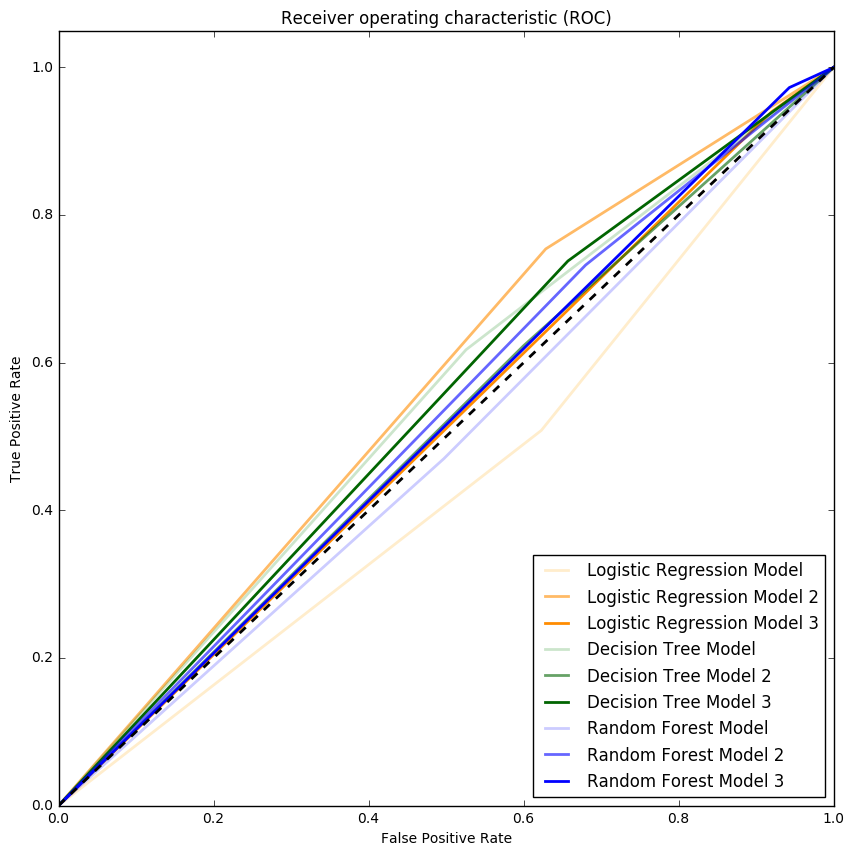

In [265]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr_l, tpr_l, color='orange', alpha = 0.2,
         lw=lw, label='Logistic Regression Model')
plt.plot(fpr_l2, tpr_l2, color='darkorange', alpha = 0.6,
         lw=lw, label='Logistic Regression Model 2')
plt.plot(fpr_l3, tpr_l3, color='darkorange',alpha = 2,
         lw=lw, label='Logistic Regression Model 3')
plt.plot(fpr_d, tpr_d, color='green',alpha = 0.2,
         lw=lw, label='Decision Tree Model')
plt.plot(fpr_d2, tpr_d2, color='darkgreen', alpha = 0.6,
         lw=lw, label='Decision Tree Model 2')
plt.plot(fpr_d3, tpr_d3, color='darkgreen',alpha = 2,
         lw=lw, label='Decision Tree Model 3')
plt.plot(fpr_f, tpr_f, color='blue',alpha = 0.2,
         lw=lw, label='Random Forest Model')
plt.plot(fpr_f2, tpr_f2, color='blue', alpha = 0.6,
         lw=lw, label='Random Forest Model 2')
plt.plot(fpr_f3, tpr_f3, color='blue',alpha = 2,
         lw=lw, label='Random Forest Model 3')
plt.plot([0, 1], [0, 1], color='Black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

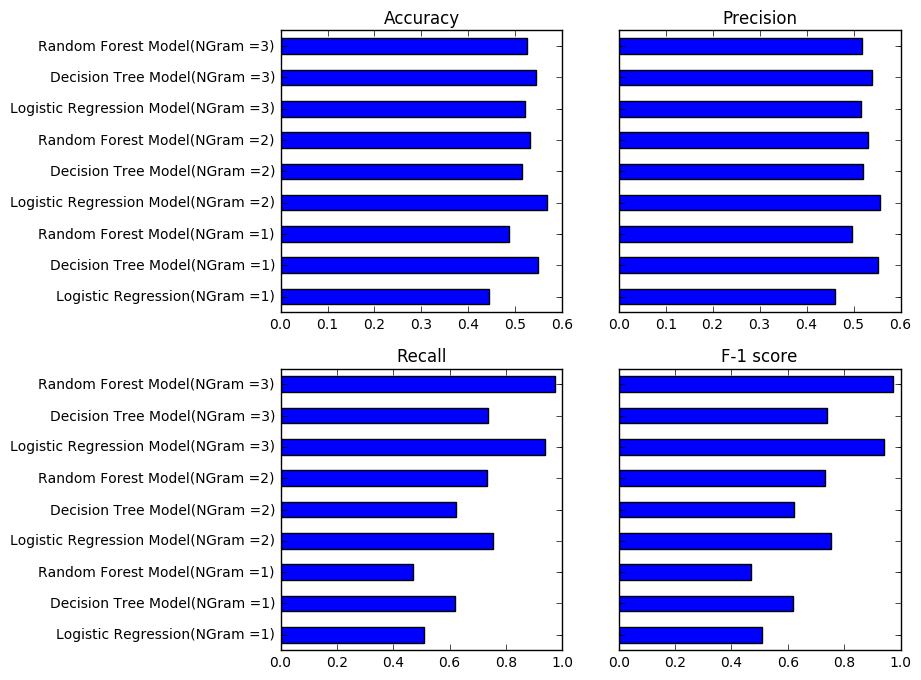

In [266]:
fig, axe = plt.subplots(2, 2, sharey=True,figsize=(8,8))

Model_Metrics.plot(ax=axe[0, 0],kind='barh',y='Accuracy',legend=False, title ='Accuracy')
Model_Metrics.plot(ax=axe[0, 1],kind='barh',y='Precision',legend=False,title ='Precision')
Model_Metrics.plot(ax=axe[1, 0],kind='barh',y='Recall',legend=False,title ='Recall')
Model_Metrics.plot(ax=axe[1, 1],kind='barh',y='F-1 score',legend=False,title ='F-1 score')

plt.show()
#plot_url = py.plot_mpl(fig)

## Best Model

Our best model is Logistic Regression with NGram=2 (i.e combination of two words) since it has the highest AUC. Logistic Regression Model also have highest accuracy and precision.

## Best Predictors

We will now find the words with the highest predictive value for NGram = 1,2 & 3.

Note: NGram = 2 has the highest predictive value but we still want to find out the words with high predictive value for NGram = 1 & 3

**Single words** that make the stock market go UP

In [267]:
words = vectorizer1.get_feature_names()
coeffs = logisticmodel1.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : words, 
                        'Coefficient' : coeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(10)

,Coefficient,Word
19523,0.460500,nigeria
29437,0.448185,tv
25390,0.441903,self
16081,0.416451,korea
5130,0.414926,canadian
20243,0.411657,olympics
31309,0.392507,woman
28617,0.390362,three
26461,0.389835,so
6194,0.380812,coast


**Single words** that make the stock market go DOWN. We can see this list has words with expected negative connotation like hacking, sanctions, low etc.

In [268]:
coeffdf.tail(10)

,Coefficient,Word
8525,-0.448525,did
25564,-0.448576,sex
7795,-0.449434,de
7177,-0.455212,country
3669,-0.464053,begin
17040,-0.471817,low
27443,-0.477251,students
12883,-0.479316,hacking
24882,-0.580911,sanctions
24667,-0.617854,run


**Combination of two words** that make the stock market go UP. We can see this list has words with expected positive connotation like right to, the first, in china etc.

In [269]:
words2 = vectorizer2.get_feature_names()
coeffs2 = logisticmodel2.coef_.tolist()[0]
d = dict(Word=words2, Coefficient =coeffs2 )
coeffdf2 = pd.DataFrame.from_dict(d, orient='index')
coeffdf2 = coeffdf2.T.dropna(axis=0, how='any')
coeffdf2 = coeffdf2.sort_values(['Coefficient', 'Word'], ascending=[0, 1],na_position ='last')

In [270]:
coeffdf2.head(10)

,Word,Coefficient
274783,right to,0.290201
319366,the first,0.279283
24964,and other,0.261388
288261,set to,0.251377
127130,found in,0.224904
161119,in south,0.224737
159090,in china,0.221512
14213,after the,0.221373
360557,will be,0.217039
174992,it has,0.211076


**Combination of two words** that make the stock market go DOWN. We can see this list has words with expected negative connotation like to kill, with iran etc.

In [271]:
coeffdf2.tail(10)

,Word,Coefficient
330094,to help,-0.197341
645,10 000,-0.202998
156597,if he,-0.203156
244978,people are,-0.20873
324530,there is,-0.218254
32006,around the,-0.219035
330361,to kill,-0.220506
362453,with iran,-0.227852
344095,up in,-0.228786
318649,the country,-0.327816


**Combination of three words** that make the stock market go UP. We can see this list has words with expected positive connotation like the right to, to the us, nobel peace prize etc.

In [272]:
words3 = vectorizer3.get_feature_names()
coeffs3 = logisticmodel3.coef_.tolist()[0]
d = dict(Word=words3, Coefficient =coeffs3 )
coeffdf3 = pd.DataFrame.from_dict(d, orient='index')
coeffdf3 = coeffdf3.T.dropna(axis=0, how='any')
coeffdf3 = coeffdf3.sort_values(['Coefficient', 'Word'], ascending=[0, 1],na_position ='last')

In [273]:
coeffdf3.head(10)

,Word,Coefficient
523099,the right to,0.167055
553372,to the us,0.166895
350531,nobel peace prize,0.16011
243316,human rights watch,0.136707
515289,the first time,0.132362
370295,of the country,0.126613
228157,have been killed,0.120156
261171,in west bank,0.119902
185564,first time in,0.119831
533549,this is the,0.109223


**Combination of three words** that make the stock market go DOWN. We can see this list has words with expected negative connotation like osama bin laden, phone hacking scandal, there is no etc.

In [274]:
coeffdf3.tail(10)

,Word,Coefficient
387527,osama bin laden,-0.103444
553764,to try to,-0.10769
403569,phone hacking scandal,-0.10944
530705,there is no,-0.110529
452584,said to be,-0.123906
363943,of human rights,-0.124836
225101,has been arrested,-0.134429
383020,one of the,-0.136961
52536,around the world,-0.19696
259504,in the country,-0.209773


# Conclusion & Future Work

Using the available dataset we have built wordclouds of the words that make the stock market go up and down.

We have then built various predictive models to get the bag of words with highest predictive accuracy.

Our results have shown that the logistic regression model with NGram = 2 has the highest AUC helping us achieve the highest possible predictive accuracy.

Although the methodology and the predictive modeling techniques used in this project were basic we have still managed to achieve an AUC of 0.562763. Predicting the stock market is probably one of the most challenging problems that the data science community encounters today.

To get better results we will need to improve our methodology incorporating more financial predictors and using more advanced and personalised Machine Learning Algorithms. 

We are at a turning point in the world, as the amount of data we collect increases and the tools at our disposal advance, we will move closer to solving such complicated problems. The financial services industry has just begun to realize the importance of data science methodologies to improve business performance. It is only a matter of time when questions like these will be answered, and when they are, the people who answer them will be celebrated as heroes. The push towards data collection, analysis and prediction will only increase in the times to come. 

Nobody can stop an idea whose time has come.